In [ ]:
 pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 8.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7c27bb2c0f84dbe7d85d38026cc97c3b28547d3c4ba456e0d20d9fa25adf9997
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [ ]:
distance = ctrl.Antecedent(np.arange(0,10.5,0.5), 'distance')
angle = ctrl.Antecedent(np.arange(0,91,1), 'angle')
speed = ctrl.Consequent(np.arange(0,5.01,0.2), 'speed')
steering = ctrl.Consequent(np.arange(0,91,1), 'steering')

In [ ]:
distance['near'] = fuzz.trapmf(distance.universe, [0,0,4,6])
distance['far'] = fuzz.trimf(distance.universe, [4,6,10])
distance['very_far'] = fuzz.trimf(distance.universe, [6,10,10])

angle['small'] = fuzz.trapmf(angle.universe, [0,0,30,60])
angle['medium'] = fuzz.trimf(angle.universe, [30,60,90])
angle['large'] = fuzz.trimf(angle.universe, [60,90,90])

speed['ss'] = fuzz.trimf(speed.universe, [0,0,2.4])
speed['ms'] = fuzz.trimf(speed.universe, [0,2.4,3.6])
speed['fs'] = fuzz.trimf(speed.universe, [2.4,5,5])
speed['mx'] = fuzz.trimf(speed.universe, [5,5,5])

steering['mst'] = fuzz.trimf(steering.universe, [0,0,45])
steering['sst'] = fuzz.trimf(steering.universe, [0,45,90])
steering['vst'] = fuzz.trimf(steering.universe, [45,90,90])

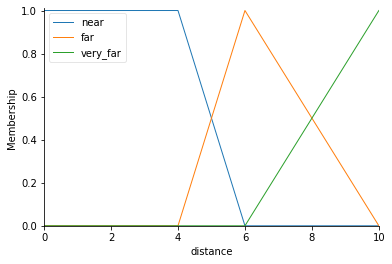

In [ ]:
distance.view()

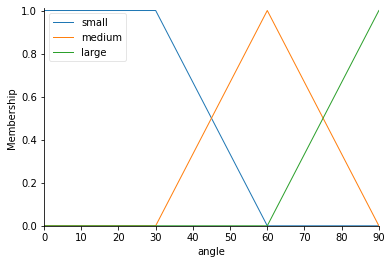

In [ ]:
angle.view()

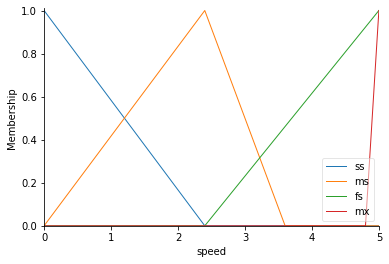

In [ ]:
speed.view()

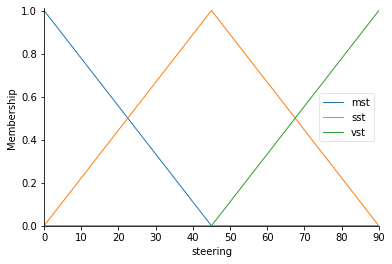

In [ ]:
steering.view()

In [ ]:
#Defining the rules
rule1 = ctrl.Rule(distance['near'] & angle['small'], speed['ms'])
rule2 = ctrl.Rule(distance['near'] & angle['medium'], speed['ss'])
rule3 = ctrl.Rule(distance['near'] & angle['large'], speed['ss'])
rule4 = ctrl.Rule(distance['near'] & angle['small'], steering['sst'])
rule5 = ctrl.Rule(distance['near'] & angle['medium'], steering['sst'])
rule6 = ctrl.Rule(distance['near'] & angle['large'], steering['vst'])
rule7 = ctrl.Rule(distance['far'] & angle['small'], speed['fs'])
rule8 = ctrl.Rule(distance['far'] & angle['medium'], speed['fs'])
rule9 = ctrl.Rule(distance['far'] & angle['large'], speed['fs'])
rule10 = ctrl.Rule(distance['far'] & angle['small'], steering['mst'])
rule11 = ctrl.Rule(distance['far'] & angle['medium'], steering['mst'])
rule12 = ctrl.Rule(distance['far'] & angle['large'], steering['mst'])
rule13 = ctrl.Rule(distance['very_far'] & angle['small'], speed['mx'])
rule14 = ctrl.Rule(distance['very_far'] & angle['medium'], speed['mx'])
rule15 = ctrl.Rule(distance['very_far'] & angle['large'], speed['mx'])
rule16 = ctrl.Rule(distance['very_far'] & angle['small'], steering['mst'])
rule17 = ctrl.Rule(distance['very_far'] & angle['medium'], steering['mst'])
rule18 = ctrl.Rule(distance['very_far'] & angle['large'], steering['mst'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f540e0dfb50>)

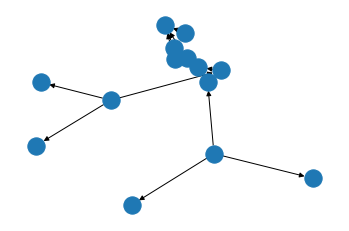

In [ ]:
rule1.view()

In [ ]:
speeding_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule7, rule8, rule9, rule13, rule14, rule15])
steering_ctrl = ctrl.ControlSystem([rule4,rule5,rule6,rule10,rule11,rule12,rule16,rule17,rule18])

speeding = ctrl.ControlSystemSimulation(speeding_ctrl)
steering_angle = ctrl.ControlSystemSimulation(steering_ctrl)

In [ ]:
#Using 2 examples of inputs
speeding.input['distance'] = 5
speeding.input['angle'] = 50
speeding.compute()

print('Speed Output: ' + str(speeding.output['speed']))

steering_angle.input['distance'] = 5
steering_angle.input['angle'] = 50
steering_angle.compute()

print('Steering Output: ' + str(steering_angle.output['steering']) + ' degrees')

Speed Output: 2.509937518595656
Steering Output: 39.64285714285717 degrees


In [ ]:
#Using 2 examples of inputs
speeding.input['distance'] = 1
speeding.input['angle'] = 75
speeding.compute()

print('Speed Output: ' + str(speeding.output['speed']))

steering_angle.input['distance'] = 1
steering_angle.input['angle'] = 75
steering_angle.compute()

print('Steering Output: ' + str(steering_angle.output['steering']) + ' degrees')

Speed Output: 0.9333333333333332
Steering Output: 50.357142857142854 degrees


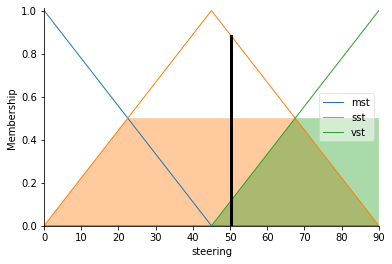

In [ ]:
steering.view(sim = steering_angle)

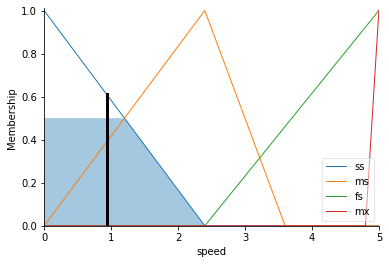

In [ ]:
speed.view(sim = speeding)